# Lab8: Data Clustering
#### (Lab8_Clustering.ipynb)

###### In this lab, you will learn how to perform data data clustering with Python

The steps included in this lab are:
1. Importing Python packages
2. Reading dataset
3. Basic Exploration & Data Pre-processing: Data Cleaning & Feature Engineering (if needed)
4. Data Clustering using K-means Algorithm
5. Performance Evaluation Metrics
6. Choosing an optimal number of cluster (k)
7. Optimal Model Creation
8. Different clustering algorithms
9. Choosing the best clustering model 

### 1. Importing Python packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 2. Reading dataset

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,NaN,1.4,0.2
1,4.9,3.0,NaN,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 3. Basic Exploration & Data Pre-processing
If the data is not ready for analysis, improve its quality first.

In [3]:
# Display how many rows and columns
df.shape

(150, 4)

In [4]:
# Display features
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [5]:
# Display the first 5 rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,NaN,1.4,0.2
1,4.9,3.0,NaN,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# Display data types of each column
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [7]:
# Check missing values
# Count of null values in each column
df.isnull().sum()

sepal_length    0
sepal_width     1
petal_length    1
petal_width     0
dtype: int64

In [8]:
# fill-in mising value with mean value 
df = df.fillna(df.mean()) 
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.051007,1.400000,0.2
1,4.9,3.000000,3.774497,0.2
2,4.7,3.200000,1.300000,0.2
3,4.6,3.100000,1.500000,0.2
4,5.0,3.600000,1.400000,0.2


#### Normalization
For dataset with numeric attributes, always need to be standardized before applying any data mining technique. 
Standardize the features uisng the MinMaxScaler class from scikit-learn's preprocessing module.

In [9]:
# Rescaling features into a range of [0,1]
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(df)
X=pd.DataFrame(X, columns=df.columns) 
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.437919,0.067797,0.041667
1,0.166667,0.416667,0.470254,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


### 4. Data Clustering using K-Means Algorithm

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
cluster_labels = kmeans.fit_predict(X)

### 5. Performance Evaluation Metrics

###### 5.1 Sum of Square Error (prefers low value)
The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum of squared criterion: 
Inertia, or the within-cluster sum of squares error, can be recognized as a measure for quality of clusters

In [11]:
sse = kmeans.inertia_ # Sum of squared distances of samples to their closest cluster center.
print("Sum of Squared Error (SSE): ", sse)

Sum of Squared Error (SSE):  12.3152045680054


###### 5.2 Silhouette coefficients (prefers high value)

In [12]:
#  A higher Silhouette Coefficient score relates to a model with better defined clusters.
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X, cluster_labels)
silhouette

0.623336491363204

### 6. Choosing an optimal number of cluster (k)
Using Elbow method, the optimal number of clusters can be found.

In [13]:
# Measure the quality of clusterings with different numbers of clusters using the inertia. 
# For each of the given values of k, perform the following steps:
#     Create a KMeans instance called model with k clusters.
#     Fit the model to the data.
#     Append the value of the inertia_ attribute of model to the list inertias.

from sklearn.cluster import KMeans

ks = range(1, 11) # for 1 to 10 clusters
sse = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    #kmeans = KMeans(n_clusters=k)
    kmeans = KMeans(n_clusters = k)#, random_state = 0)

    # Fit model to samples
    kmeans.fit(X)

    # Append the inertia to the list of inertias
    sse.append(kmeans.inertia_)

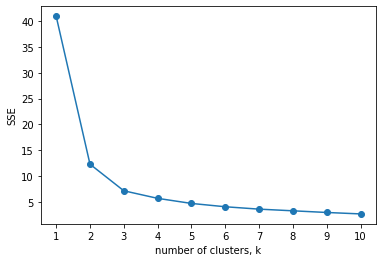

In [14]:
# Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!
# Plot ks vs inertias
plt.plot(ks, sse, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

###### From the graph that k=3 is a good number of clusters, since it is a point where the SSE begins to decrease more slowly.

### 7. Optimal Model Creation
Use the optimal k value from the previos section to create a model and assign cluster label for each data sample (use .fit_predict)

In [15]:
#Applying kmeans to the dataset with the optimal k value
k = 3
kmeans = KMeans(n_clusters = k)
y_kmeans = kmeans.fit_predict(X)
col_names = list(df.columns.values)

# append cluster labels to the last column of the dataset
result = pd.concat([pd.DataFrame(df,columns=col_names), pd.DataFrame(y_kmeans,columns=['ClusterLabels']) ], axis=1)

#cluster label starts from 0 --> for Iris with k=3, cluster labels are [0,1,2] 
result.head()

,sepal_length,sepal_width,petal_length,petal_width,ClusterLabels
0,5.1,3.051007,1.400000,0.2,0
1,4.9,3.000000,3.774497,0.2,0
2,4.7,3.200000,1.300000,0.2,0
3,4.6,3.100000,1.500000,0.2,0
4,5.0,3.600000,1.400000,0.2,0


###### Save clustering result

In [16]:
result.to_csv('iris_clusters.csv')

##### Get more infotmation from the clusering: SSE and Centriod data

In [17]:
# Get more infotmation from the clusering

# Sum of Squared Error of the oprimum model
sse = kmeans.inertia_
print("Sum of Squared Error (SSE): ", sse)

Sum of Squared Error (SSE):  7.1696302912524414


In [18]:
# Number of members in each cluster
result.ClusterLabels.value_counts()

1    61
0    50
2    39
Name: ClusterLabels, dtype: int64

In [19]:
# Centriod for each cluster
print("Centroid data (Normalized):")
print(kmeans.cluster_centers_)
# Transform centroid data back to the original scale.
centriod = mms.inverse_transform(kmeans.cluster_centers_)
print("Centroid data (Original Feature Scales):")
print(centriod)

Centroid data (Normalized):
[[0.19611111 0.58709172 0.08669321 0.06      ]
 [0.44125683 0.30737705 0.57571548 0.54918033]
 [0.70726496 0.4508547  0.79704476 0.82478632]]
Centroid data (Original Feature Scales):
[[5.006      3.40902013 1.51148993 0.244     ]
 [5.88852459 2.73770492 4.39672131 1.41803279]
 [6.84615385 3.08205128 5.7025641  2.07948718]]


#### END.